<h1><center>Performance Assessment Task 1 - Linear Regression Modeling</center></h1>
<h3><center> by Bader Ale <center><h3>

# ▶ Research Question
Our research questions is as follows: __What patient factors contributed to the highest total charge billed to the patient during their hospital stay.__.

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing original dataset
df = pd.read_csv('F:/GitHub Repos/WGU_MSDA/D208_Predictive Modeling/medical_clean.csv')

# ▶ Data Cleaning  

In [3]:
# Showing first 5 records
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
# Creating new dataframe with only those variables of interest
df1 = df[['Area','Age', 'Income','Marital', 'Gender', 'VitD_levels', 'Doc_visits', 'Initial_admin','Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Asthma','Services','Initial_days', 'TotalCharge']]
df1.head()

,Area,Age,Income,Marital,Gender,VitD_levels,Doc_visits,Initial_admin,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,Asthma,Services,Initial_days,TotalCharge
0,Suburban,53,86575.93,Divorced,Male,19.141466,6,Emergency Admission,Medium,No,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860
1,Urban,51,46805.99,Married,Female,18.940352,4,Emergency Admission,High,Yes,No,No,No,No,Intravenous,15.129562,4193.190458
2,Suburban,53,14370.14,Widowed,Female,18.057507,4,Elective Admission,Medium,Yes,No,Yes,No,No,Blood Work,4.772177,2434.234222
3,Suburban,78,39741.49,Married,Male,16.576858,4,Elective Admission,Medium,No,Yes,No,No,Yes,Blood Work,1.714879,2127.830423
4,Rural,22,1209.56,Widowed,Female,17.439069,5,Elective Admission,Low,No,No,No,Yes,No,CT Scan,1.254807,2113.073274


## Detection and Treatment of Nulls

In [5]:
# Getting number of rows and columns
df1.shape

(10000, 17)

In [6]:
# Checking for null values
df1.isnull().sum()

Area                 0
Age                  0
Income               0
Marital              0
Gender               0
VitD_levels          0
Doc_visits           0
Initial_admin        0
Complication_risk    0
Overweight           0
Arthritis            0
Diabetes             0
Hyperlipidemia       0
Asthma               0
Services             0
Initial_days         0
TotalCharge          0
dtype: int64

Here we can see there are no Nulls in our new dataframe

## Detection and Treatment of Duplicated Values

In [7]:
# Checking for duplicates
df1.duplicated().value_counts()

False    10000
dtype: int64

The output shows 10000 records as being False, therefore we do not have any duplicated values.

## Detection and Treatment of Outliers

In [8]:
# Checking datatypes for all variables in new dataframe
df1.dtypes

Area                  object
Age                    int64
Income               float64
Marital               object
Gender                object
VitD_levels          float64
Doc_visits             int64
Initial_admin         object
Complication_risk     object
Overweight            object
Arthritis             object
Diabetes              object
Hyperlipidemia        object
Asthma                object
Services              object
Initial_days         float64
TotalCharge          float64
dtype: object

We will first focus on the continuous variables and analyze, if any, the outliers. We will normalize our data for ease of visual interpretation

In [9]:
# Performing normalization on the continuous variables for the new dataframe
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df1[['Age', 'Income', 'VitD_levels','Doc_visits','Initial_days','TotalCharge']]) # Selecting only those numerical variables in our new dataframe
scaled = scaler.fit_transform(df1[['Age', 'Income', 'VitD_levels','Doc_visits','Initial_days','TotalCharge']])
df1_norm = pd.DataFrame(scaled, columns = ['Age', 'Income', 'VitD_levels','Doc_visits','Initial_days','TotalCharge']) # Creating a new dataframe for visualization

MinMaxScaler()

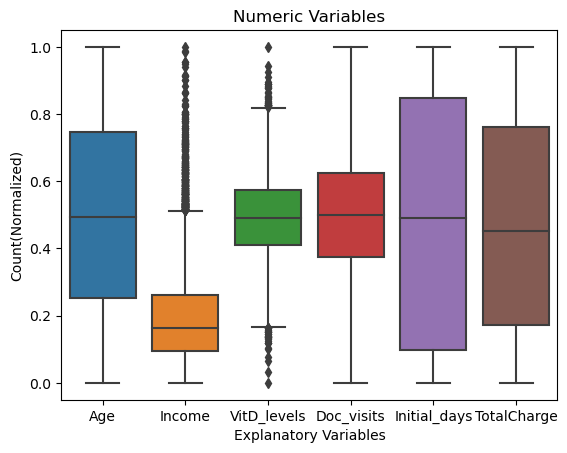

In [10]:
# Plotting boxplots
sns.boxplot(df1_norm)
plt.title('Numeric Variables')
plt.ylabel('Count(Normalized)')
plt.xlabel('Explanatory Variables');

In [11]:
# Importing SciPy library
import scipy.stats as stats

# Creating a new column for the Income and VitaminD_level z-scores
df1['Income_z_Scores'] = stats.zscore(df1['Income'])
df1['VitD_level_z_Scores'] = stats.zscore(df1['VitD_levels'])

In [12]:
df1.head()

,Area,Age,Income,Marital,Gender,VitD_levels,Doc_visits,Initial_admin,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,Asthma,Services,Initial_days,TotalCharge,Income_z_Scores,VitD_level_z_Scores
0,Suburban,53,86575.93,Divorced,Male,19.141466,6,Emergency Admission,Medium,No,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,1.615914,0.583603
1,Urban,51,46805.99,Married,Female,18.940352,4,Emergency Admission,High,Yes,No,No,No,No,Intravenous,15.129562,4193.190458,0.221443,0.483901
2,Suburban,53,14370.14,Widowed,Female,18.057507,4,Elective Admission,Medium,Yes,No,Yes,No,No,Blood Work,4.772177,2434.234222,-0.915870,0.046227
3,Suburban,78,39741.49,Married,Male,16.576858,4,Elective Admission,Medium,No,Yes,No,No,Yes,Blood Work,1.714879,2127.830423,-0.026263,-0.687811
4,Rural,22,1209.56,Widowed,Female,17.439069,5,Elective Admission,Low,No,No,No,Yes,No,CT Scan,1.254807,2113.073274,-1.377325,-0.260366


In [13]:
# Creating a new dataframe with extracted Income and VitD_levels outliers
df1_no_outliers = df1[(df1['Income_z_Scores'] > -3) & (df1['Income_z_Scores'] < 3) & (df1['VitD_level_z_Scores'] > -3) & (df1['VitD_level_z_Scores'] < 3)]

In [14]:
df1_no_outliers.head()

,Area,Age,Income,Marital,Gender,VitD_levels,Doc_visits,Initial_admin,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,Asthma,Services,Initial_days,TotalCharge,Income_z_Scores,VitD_level_z_Scores
0,Suburban,53,86575.93,Divorced,Male,19.141466,6,Emergency Admission,Medium,No,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,1.615914,0.583603
1,Urban,51,46805.99,Married,Female,18.940352,4,Emergency Admission,High,Yes,No,No,No,No,Intravenous,15.129562,4193.190458,0.221443,0.483901
2,Suburban,53,14370.14,Widowed,Female,18.057507,4,Elective Admission,Medium,Yes,No,Yes,No,No,Blood Work,4.772177,2434.234222,-0.915870,0.046227
3,Suburban,78,39741.49,Married,Male,16.576858,4,Elective Admission,Medium,No,Yes,No,No,Yes,Blood Work,1.714879,2127.830423,-0.026263,-0.687811
4,Rural,22,1209.56,Widowed,Female,17.439069,5,Elective Admission,Low,No,No,No,Yes,No,CT Scan,1.254807,2113.073274,-1.377325,-0.260366


In [15]:
# Dropping the Income_z_Scores and Vit_D_levels columns since
# we won't need it anymore
df1_no_outliers.drop(['Income_z_Scores', 'VitD_level_z_Scores'], axis=1, inplace=True)

df1_no_outliers.head()

,Area,Age,Income,Marital,Gender,VitD_levels,Doc_visits,Initial_admin,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,Asthma,Services,Initial_days,TotalCharge
0,Suburban,53,86575.93,Divorced,Male,19.141466,6,Emergency Admission,Medium,No,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860
1,Urban,51,46805.99,Married,Female,18.940352,4,Emergency Admission,High,Yes,No,No,No,No,Intravenous,15.129562,4193.190458
2,Suburban,53,14370.14,Widowed,Female,18.057507,4,Elective Admission,Medium,Yes,No,Yes,No,No,Blood Work,4.772177,2434.234222
3,Suburban,78,39741.49,Married,Male,16.576858,4,Elective Admission,Medium,No,Yes,No,No,Yes,Blood Work,1.714879,2127.830423
4,Rural,22,1209.56,Widowed,Female,17.439069,5,Elective Admission,Low,No,No,No,Yes,No,CT Scan,1.254807,2113.073274


# ▶ Exploratory Data Analysis  

In [16]:
# Summary Statistics
df1_no_outliers.describe()

,Age,Income,VitD_levels,Doc_visits,Initial_days,TotalCharge
count,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000
mean,53.525069,38903.649265,17.962174,5.011899,34.470464,5314.010109
std,20.638565,25402.245710,1.990759,1.044358,26.303679,2180.208144
min,18.000000,154.080000,11.966340,1.000000,1.001981,1938.312067
25%,36.000000,19359.670000,16.631741,4.000000,7.912315,3181.474658
50%,53.000000,33261.940000,17.952513,5.000000,36.221460,5233.963093
75%,71.000000,53261.710000,19.339610,6.000000,61.157850,7460.305000
max,89.000000,125977.370000,23.941426,9.000000,71.981490,9180.728000


In [17]:
df1_no_outliers.dtypes

Area                  object
Age                    int64
Income               float64
Marital               object
Gender                object
VitD_levels          float64
Doc_visits             int64
Initial_admin         object
Complication_risk     object
Overweight            object
Arthritis             object
Diabetes              object
Hyperlipidemia        object
Asthma                object
Services              object
Initial_days         float64
TotalCharge          float64
dtype: object

## Univariate Analysis  
### Numeric Variables

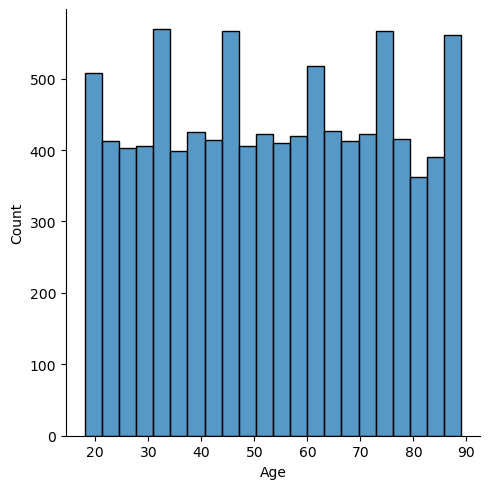

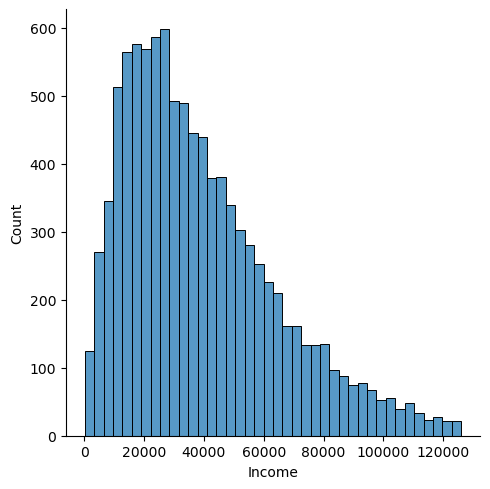

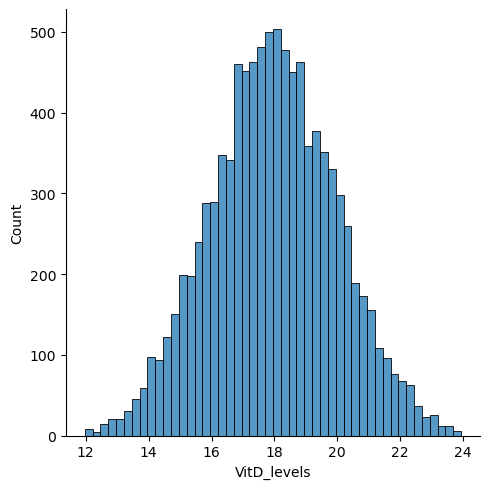

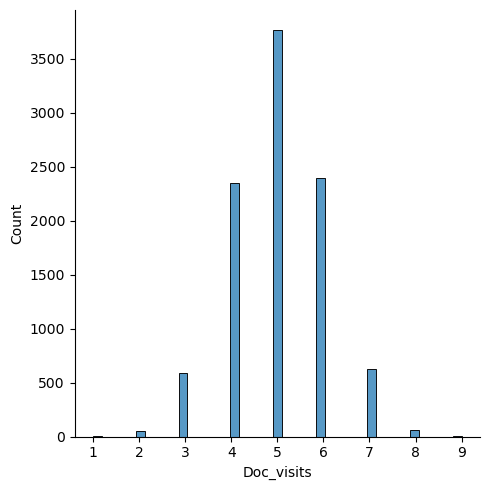

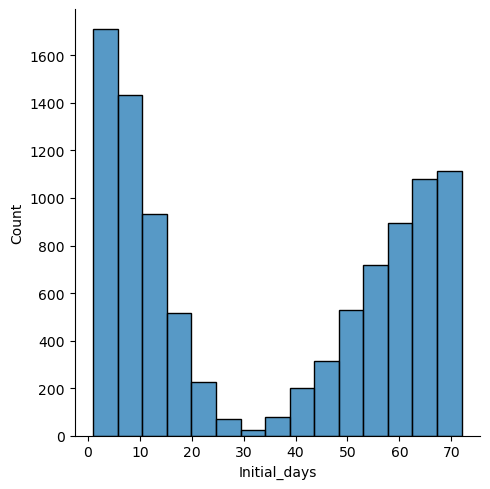

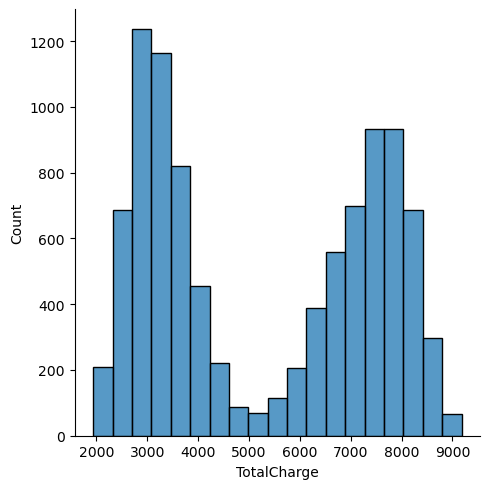

In [18]:
# Univariate analysis visualizations for numerical variables
sns.displot(df1_no_outliers['Age']);
sns.displot(df1_no_outliers['Income']);
sns.displot(df1_no_outliers['VitD_levels']);
sns.displot(df1_no_outliers['Doc_visits']);
sns.displot(df1_no_outliers['Initial_days']);
sns.displot(df1_no_outliers['TotalCharge']);

### Categorical Variables

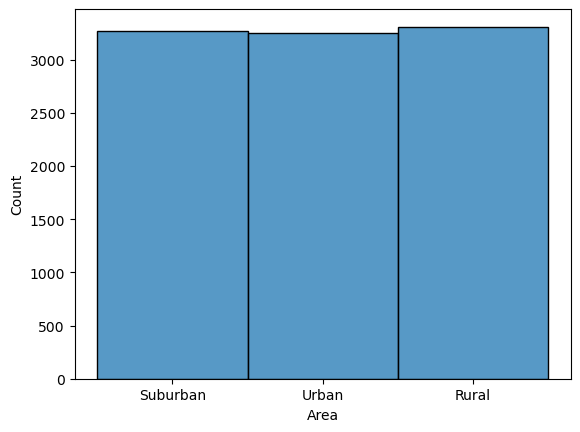

In [19]:
sns.histplot(df1_no_outliers['Area']);

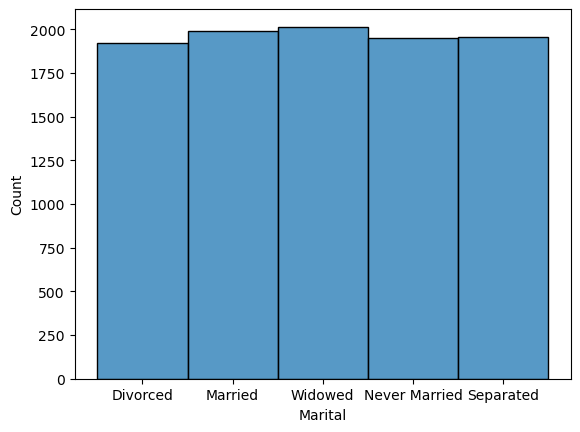

In [20]:
sns.histplot(df1_no_outliers['Marital']);

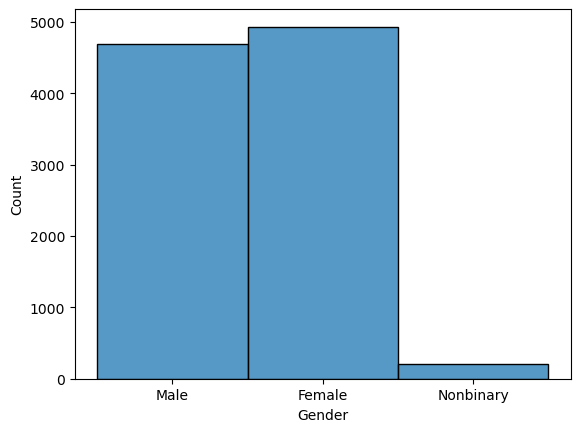

In [21]:
sns.histplot(df1_no_outliers['Gender']);

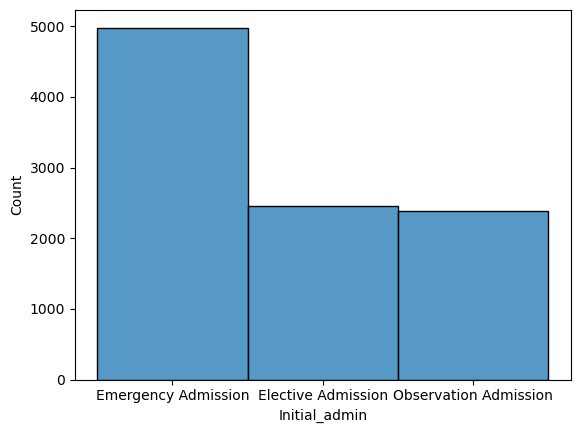

In [22]:
sns.histplot(df1_no_outliers['Initial_admin']);

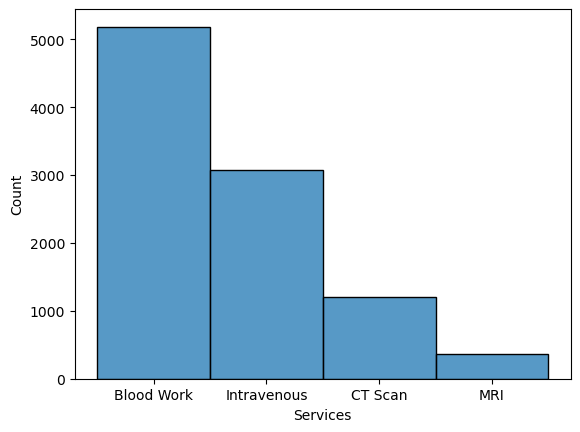

In [23]:
sns.histplot(df1_no_outliers['Services']);

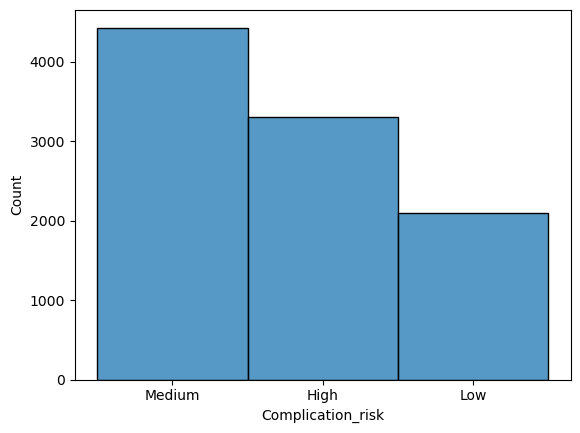

In [24]:
sns.histplot(df1_no_outliers['Complication_risk']);

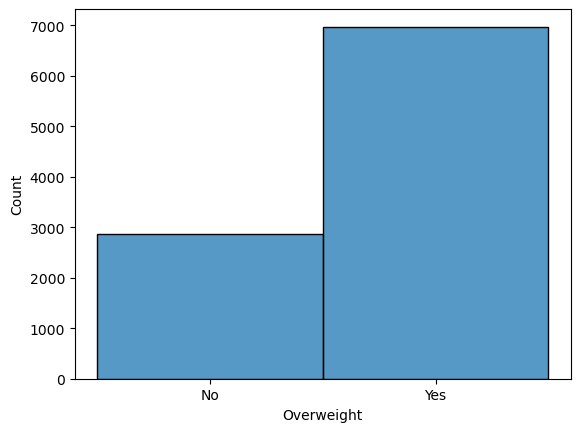

In [25]:
sns.histplot(df1_no_outliers['Overweight']);

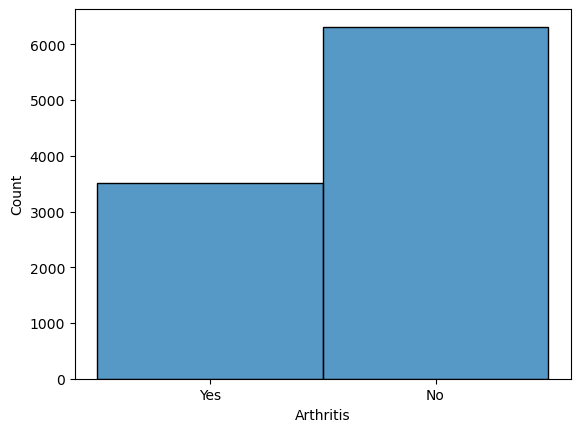

In [26]:
sns.histplot(df1_no_outliers['Arthritis']);

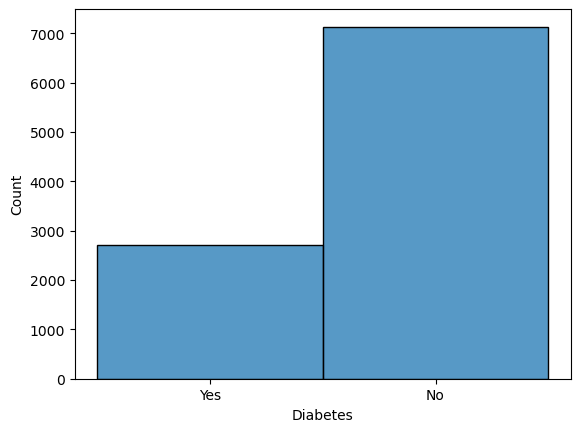

In [27]:
sns.histplot(df1_no_outliers['Diabetes']);

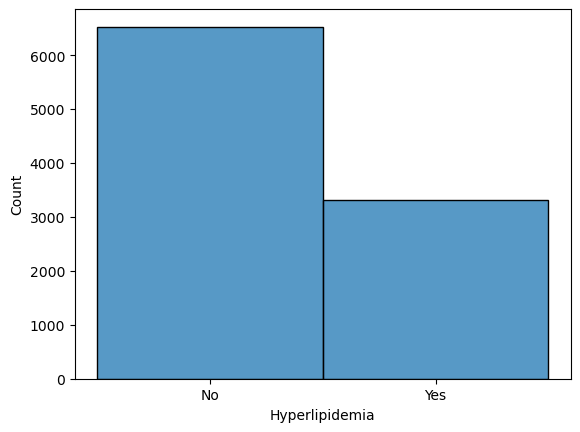

In [28]:
sns.histplot(df1_no_outliers['Hyperlipidemia']);

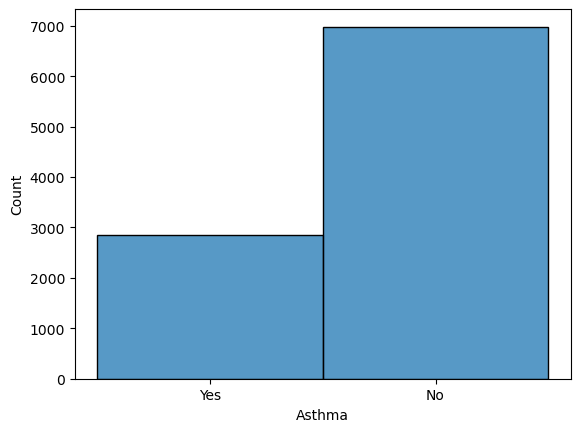

In [29]:
sns.histplot(df1_no_outliers['Asthma']);

## Bivariate Analysis  
### Numeric Variables

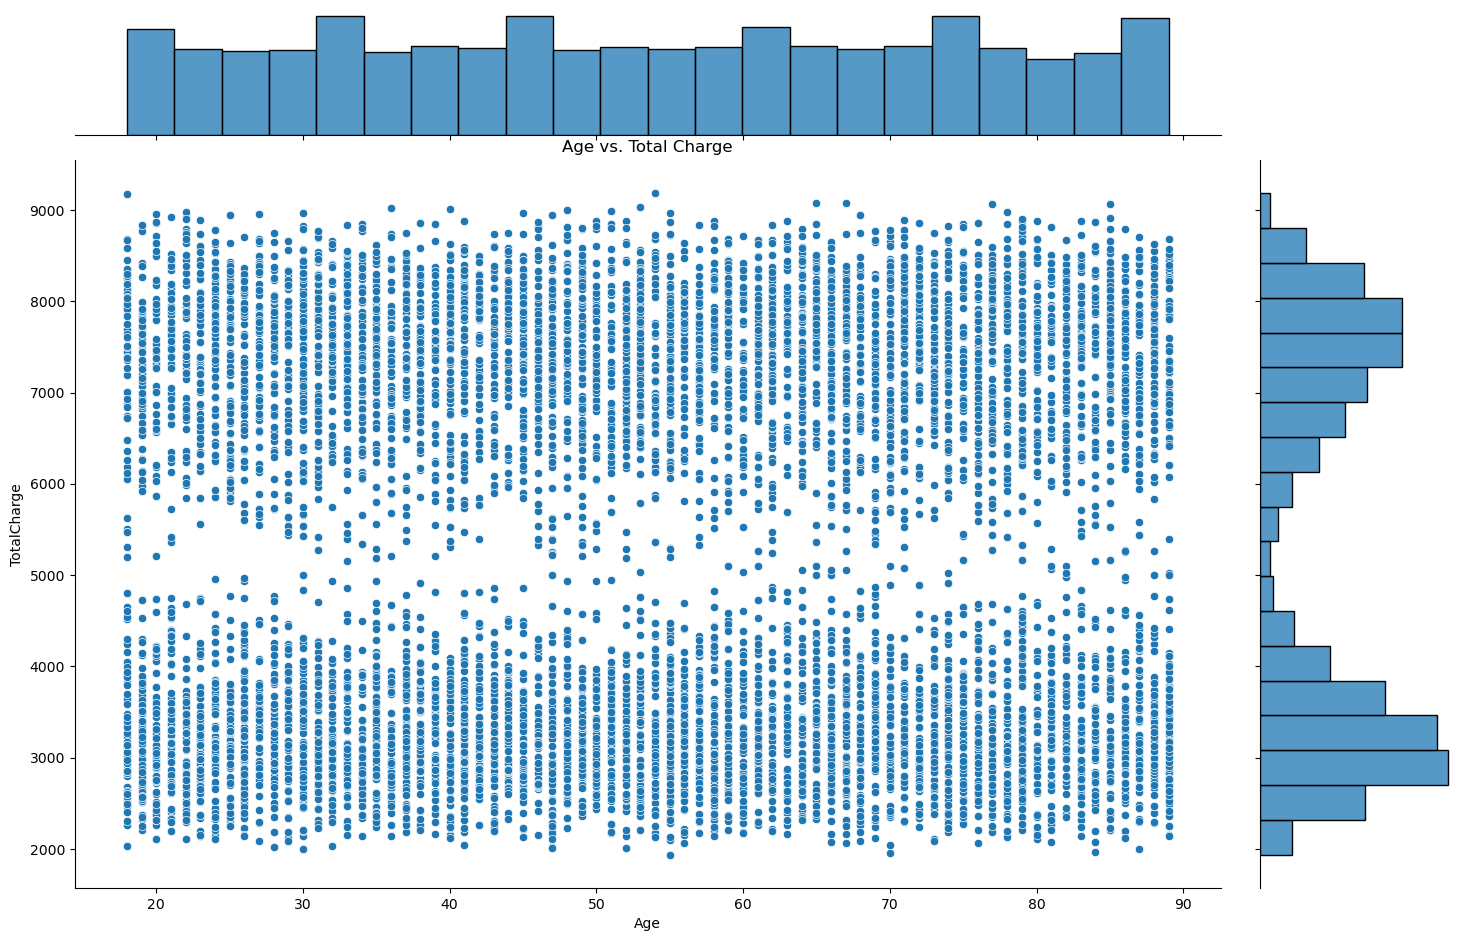

In [30]:
# Bivariate analysis visualizations for Age vs Total_Charge
sns.jointplot(data=df1_no_outliers, x='Age', y='TotalCharge')
plt.title('Age vs. Total Charge')
fig = plt.gcf()
fig.set_size_inches(16, 10);

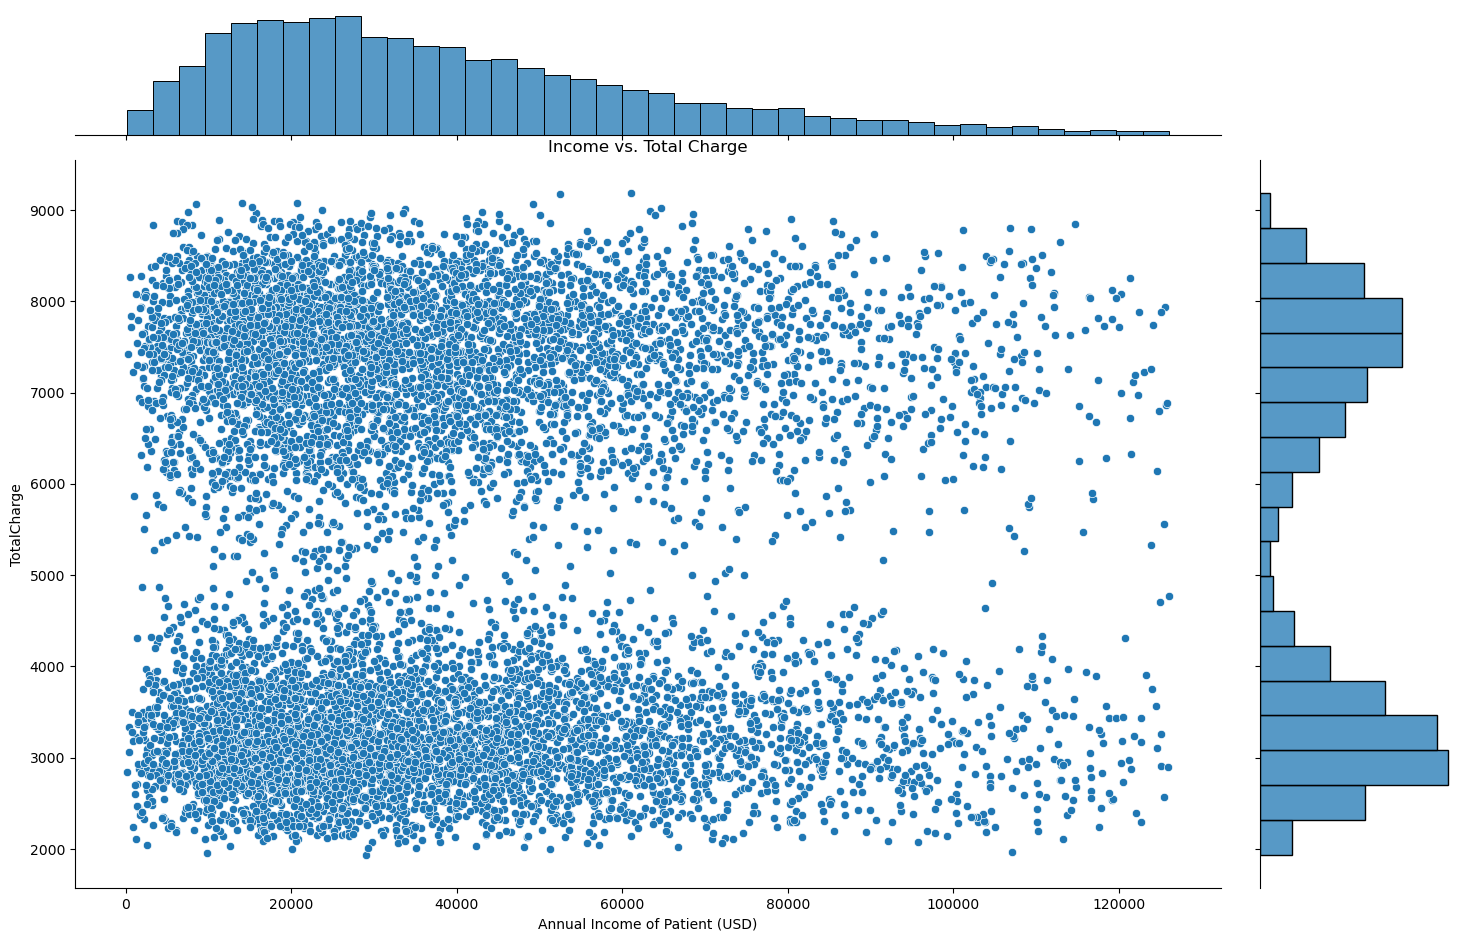

In [31]:
# Income vs Total Charge
sns.jointplot(data=df1_no_outliers, x='Income', y='TotalCharge')
plt.title('Income vs. Total Charge')
plt.xlabel('Annual Income of Patient (USD)')
fig = plt.gcf()
fig.set_size_inches(16, 10);

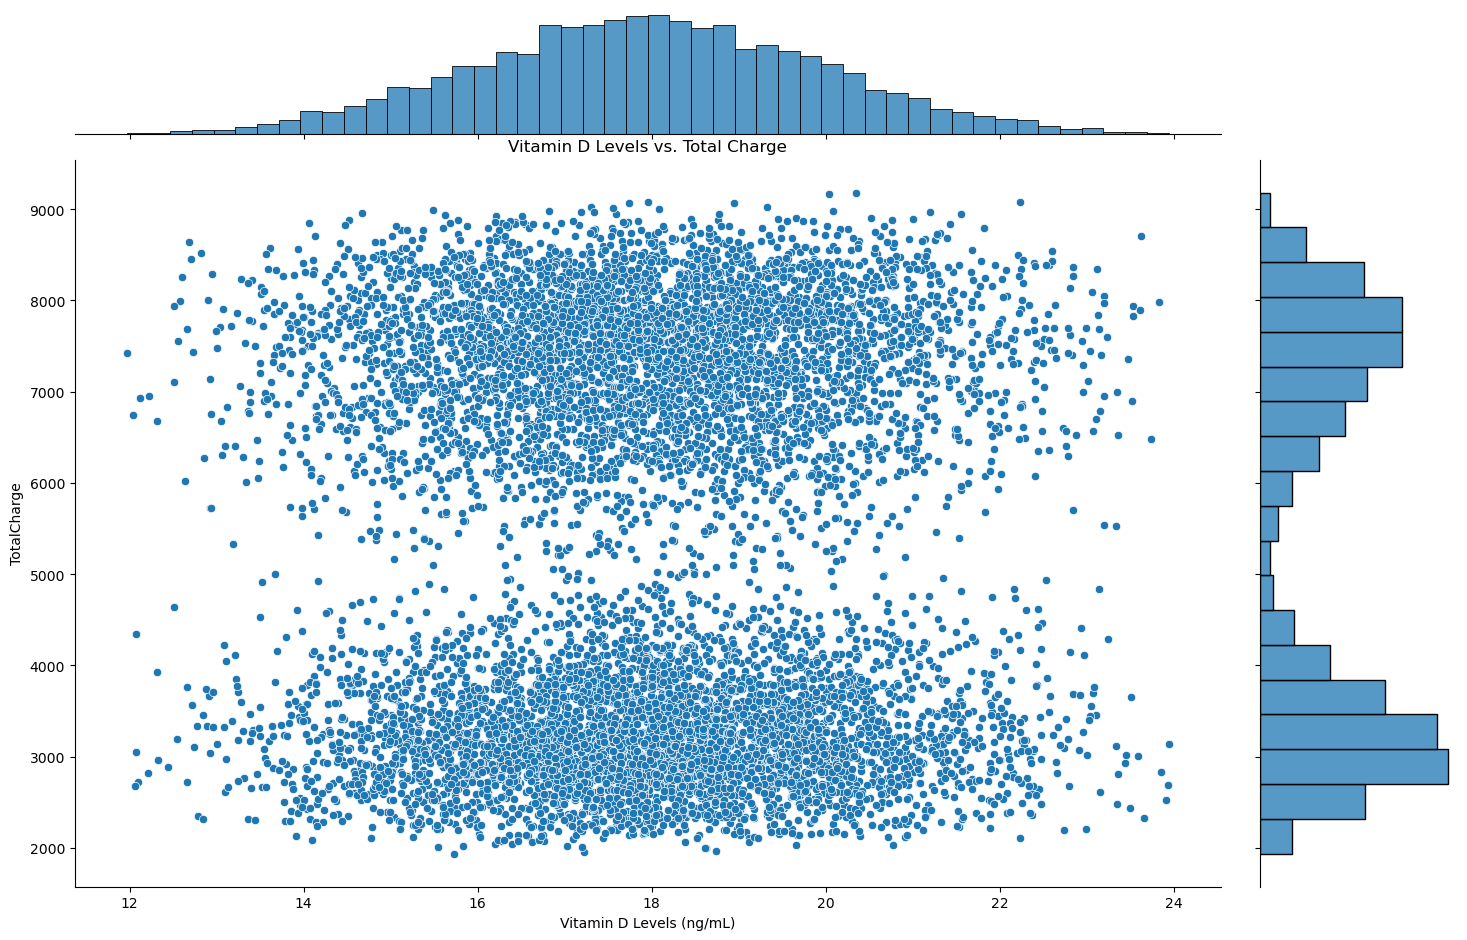

In [32]:
# VitaminD Levels vs Total Charge
sns.jointplot(data=df1_no_outliers, x='VitD_levels', y='TotalCharge')
plt.title('Vitamin D Levels vs. Total Charge')
plt.xlabel('Vitamin D Levels (ng/mL)')
fig = plt.gcf()
fig.set_size_inches(16, 10);

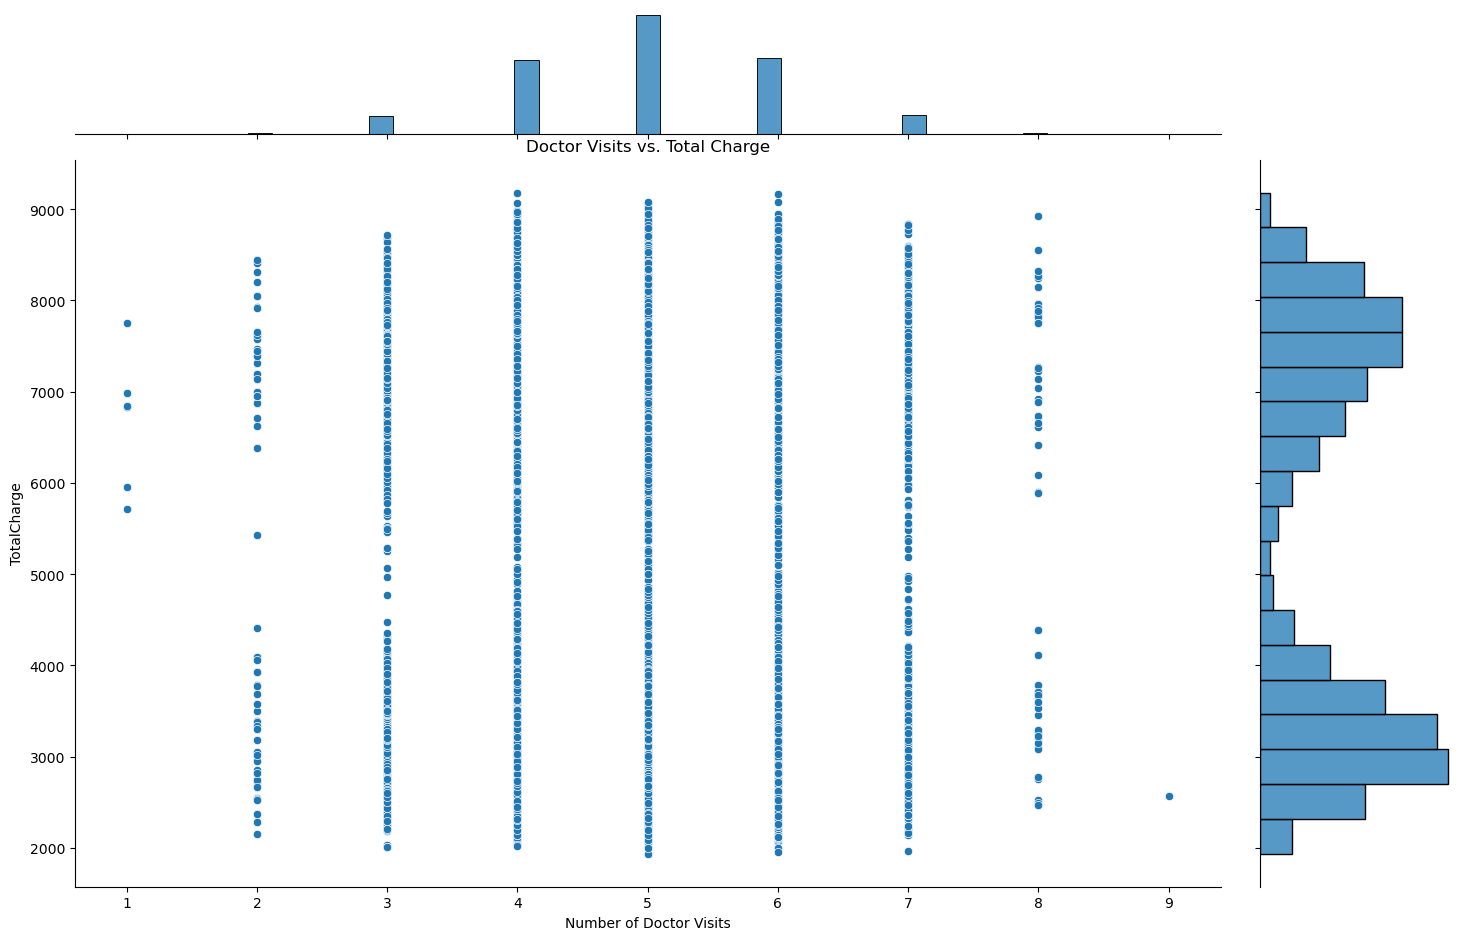

In [33]:
# Doc-Visits vs Total Charge
sns.jointplot(data=df1_no_outliers, x='Doc_visits', y='TotalCharge')
plt.title('Doctor Visits vs. Total Charge')
plt.xlabel('Number of Doctor Visits')
fig = plt.gcf()
fig.set_size_inches(16, 10);

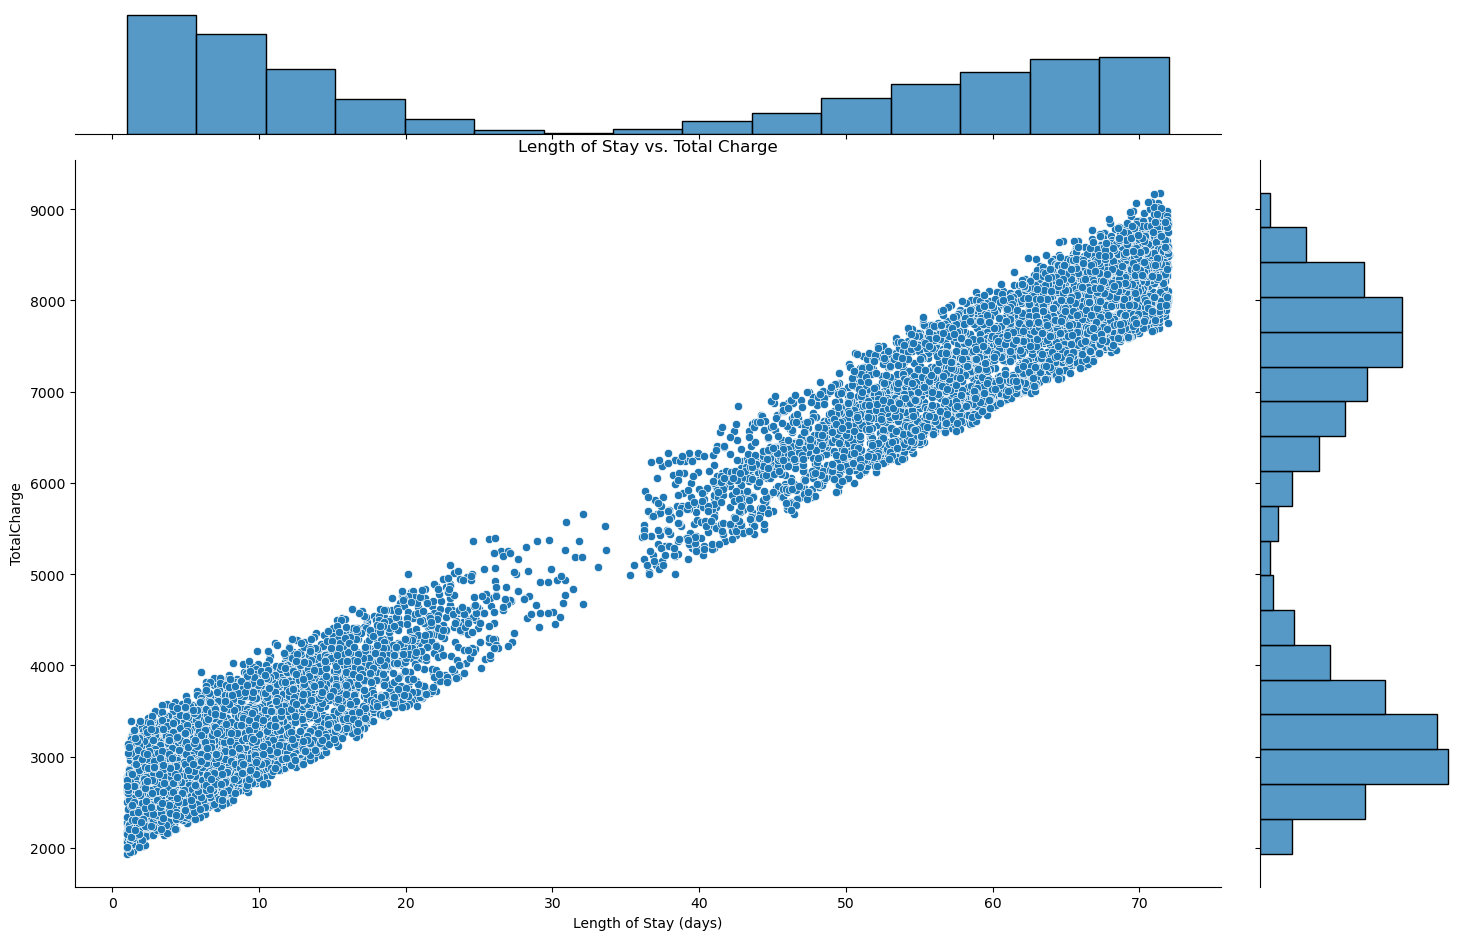

In [34]:
# Doc-Visits vs Total Charge
sns.jointplot(data=df1_no_outliers, x='Initial_days', y='TotalCharge')
plt.title('Length of Stay vs. Total Charge')
plt.xlabel('Length of Stay (days)')
fig = plt.gcf()
fig.set_size_inches(16, 10);

### Categorical Variables

In [35]:
df1_no_outliers.head()

,Area,Age,Income,Marital,Gender,VitD_levels,Doc_visits,Initial_admin,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,Asthma,Services,Initial_days,TotalCharge
0,Suburban,53,86575.93,Divorced,Male,19.141466,6,Emergency Admission,Medium,No,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860
1,Urban,51,46805.99,Married,Female,18.940352,4,Emergency Admission,High,Yes,No,No,No,No,Intravenous,15.129562,4193.190458
2,Suburban,53,14370.14,Widowed,Female,18.057507,4,Elective Admission,Medium,Yes,No,Yes,No,No,Blood Work,4.772177,2434.234222
3,Suburban,78,39741.49,Married,Male,16.576858,4,Elective Admission,Medium,No,Yes,No,No,Yes,Blood Work,1.714879,2127.830423
4,Rural,22,1209.56,Widowed,Female,17.439069,5,Elective Admission,Low,No,No,No,Yes,No,CT Scan,1.254807,2113.073274


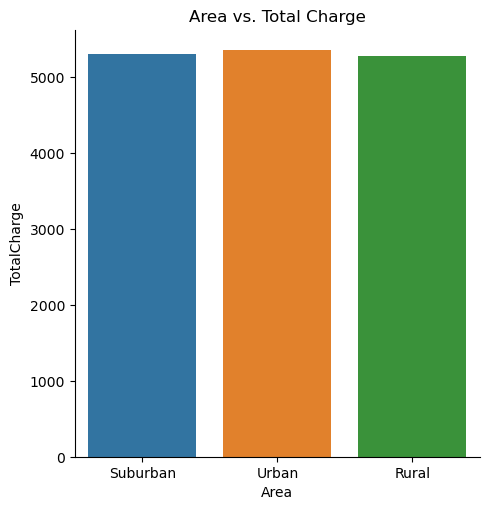

In [36]:
sns.catplot(data=df1_no_outliers, x="Area", y="TotalCharge", kind='bar', errorbar=None)
plt.title('Area vs. Total Charge');

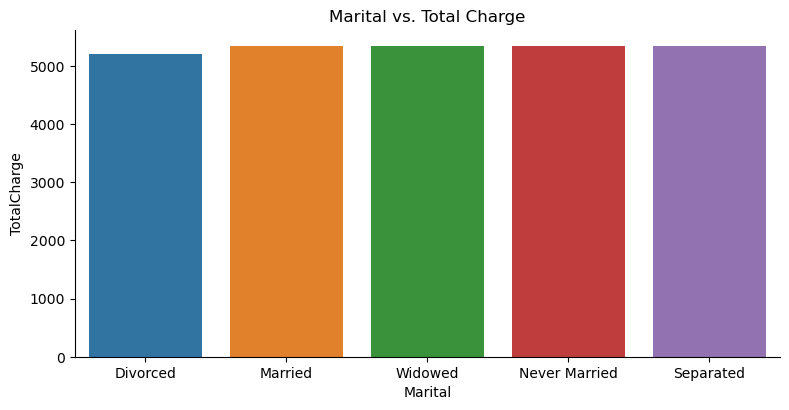

In [37]:
sns.catplot(data=df1_no_outliers, x="Marital", y="TotalCharge", kind='bar', errorbar=None, height=4, aspect=2)
plt.title('Marital vs. Total Charge');

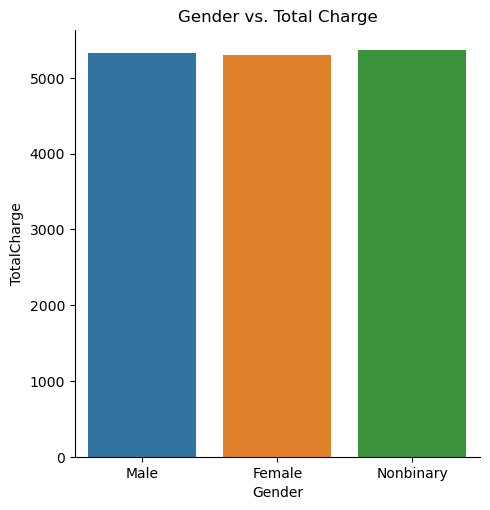

In [38]:
sns.catplot(data=df1_no_outliers, x="Gender", y="TotalCharge", kind='bar', errorbar=None)
plt.title('Gender vs. Total Charge');

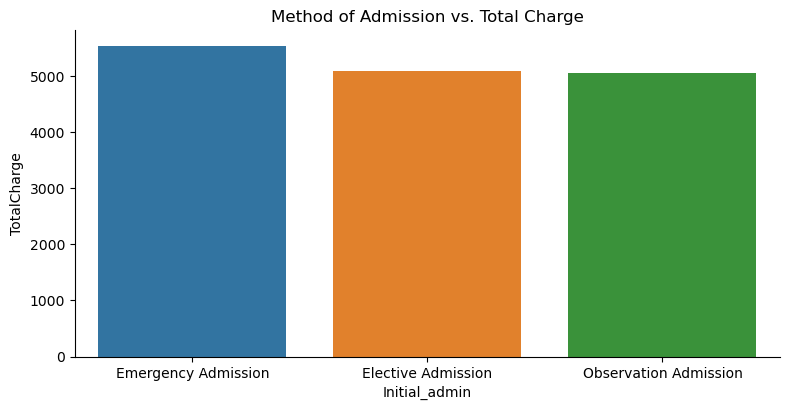

In [39]:
sns.catplot(data=df1_no_outliers, x="Initial_admin", y="TotalCharge", kind='bar', errorbar=None,height=4, aspect=2)
plt.title('Method of Admission vs. Total Charge');

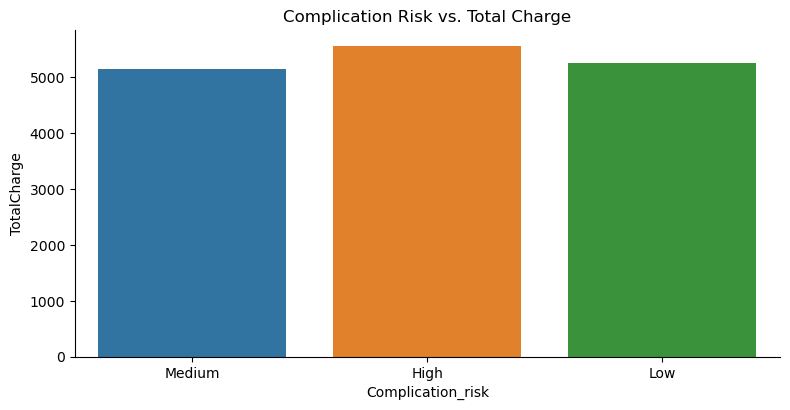

In [40]:
sns.catplot(data=df1_no_outliers, x="Complication_risk", y="TotalCharge", kind='bar', errorbar=None,height=4, aspect=2)
plt.title('Complication Risk vs. Total Charge');

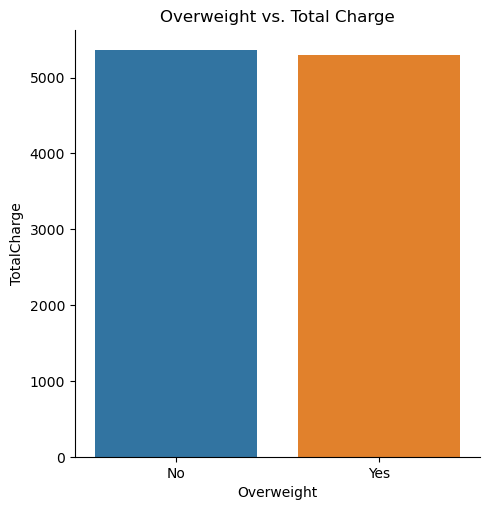

In [41]:
sns.catplot(data=df1_no_outliers, x="Overweight", y="TotalCharge", kind='bar', errorbar=None)
plt.title('Overweight vs. Total Charge');

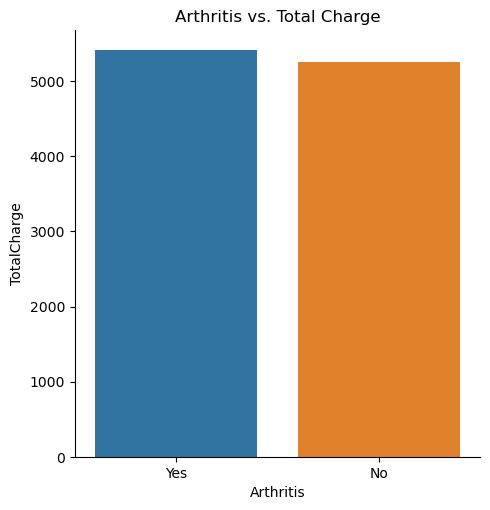

In [42]:
sns.catplot(data=df1_no_outliers, x="Arthritis", y="TotalCharge", kind='bar', errorbar=None)
plt.title('Arthritis vs. Total Charge');

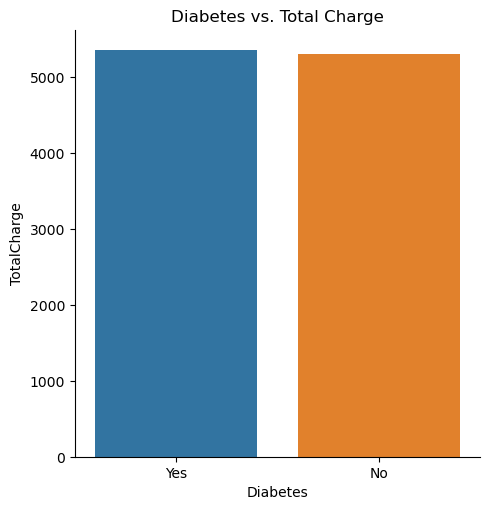

In [43]:
sns.catplot(data=df1_no_outliers, x="Diabetes", y="TotalCharge", kind='bar', errorbar=None)
plt.title('Diabetes vs. Total Charge');

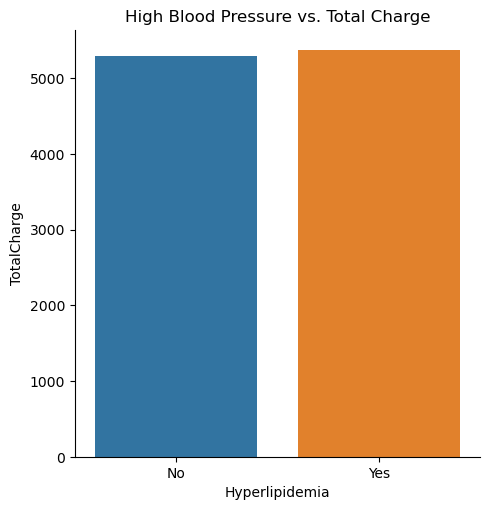

In [44]:
sns.catplot(data=df1_no_outliers, x="Hyperlipidemia", y="TotalCharge", kind='bar', errorbar=None)
plt.title('High Blood Pressure vs. Total Charge');

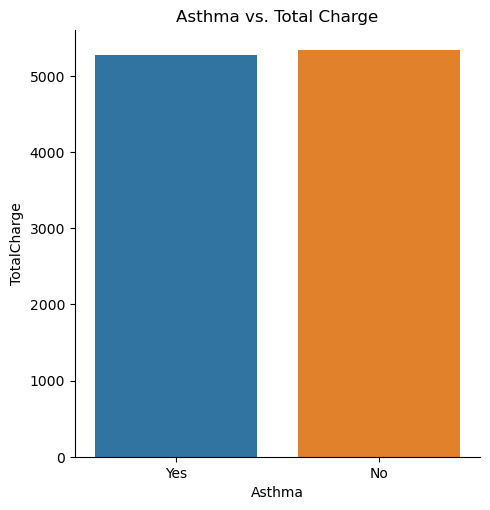

In [45]:
sns.catplot(data=df1_no_outliers, x="Asthma", y="TotalCharge", kind='bar', errorbar=None)
plt.title('Asthma vs. Total Charge');

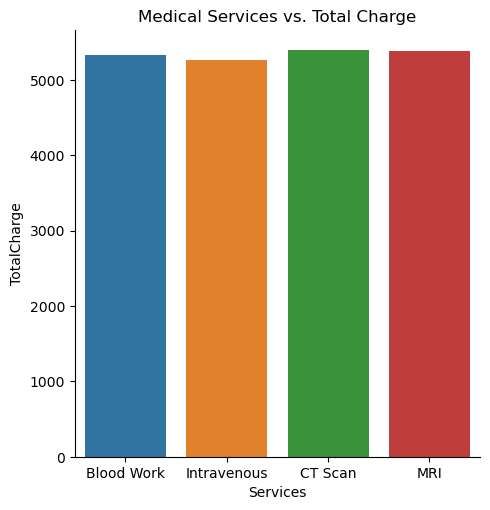

In [46]:
sns.catplot(data=df1_no_outliers, x="Services", y="TotalCharge", kind='bar', errorbar=None)
plt.title('Medical Services vs. Total Charge');

# ▶ Data Wrangling  
In this section, we will rexpress the categorical variables 

In [47]:
# Printing datatypes 
df1_no_outliers.dtypes

Area                  object
Age                    int64
Income               float64
Marital               object
Gender                object
VitD_levels          float64
Doc_visits             int64
Initial_admin         object
Complication_risk     object
Overweight            object
Arthritis             object
Diabetes              object
Hyperlipidemia        object
Asthma                object
Services              object
Initial_days         float64
TotalCharge          float64
dtype: object

In [48]:
# Using One-Hot encoding for nominal variables
df2 = pd.get_dummies(data=df1_no_outliers, columns=['Area','Marital','Gender', 'Initial_admin','Overweight','Arthritis', 'Services', 'Overweight', 'Diabetes', 'Hyperlipidemia', 'Asthma'], drop_first=True )

In [49]:
# Using Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
complication_encoded = enc.fit_transform(df2[['Complication_risk']])
df2['Complication_risk'] = complication_encoded

df2.head(10)


,Age,Income,VitD_levels,Doc_visits,Complication_risk,Initial_days,TotalCharge,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Overweight_Yes,Arthritis_Yes,Services_CT Scan,Services_Intravenous,Services_MRI,Overweight_Yes,Diabetes_Yes,Hyperlipidemia_Yes,Asthma_Yes
0,53,86575.93,19.141466,6,2.0,10.585770,3726.702860,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1
1,51,46805.99,18.940352,4,0.0,15.129562,4193.190458,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
2,53,14370.14,18.057507,4,2.0,4.772177,2434.234222,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
3,78,39741.49,16.576858,4,2.0,1.714879,2127.830423,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,22,1209.56,17.439069,5,1.0,1.254807,2113.073274,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
5,76,81999.88,19.612646,6,2.0,5.957250,2636.691180,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,0
6,50,10456.05,14.751687,6,1.0,9.058210,3694.627161,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,1,1,0
7,40,38319.29,19.688673,7,2.0,14.228019,3021.499039,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0
8,48,55586.48,19.653320,6,1.0,6.180339,2968.402860,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0
9,78,38965.22,18.224324,7,0.0,1.632554,3147.855813,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1


In [50]:
# Exporting dataframe to CSV
df2.to_csv('model_data.csv',index=True)

# ▶ Initial Multiple Linear Regression Model  
We will now construct our initial model

In [51]:
import statsmodels.api as sm
import seaborn as sns

# Creating feature variables, where X = independent variables and Y=dependent variables
X_data = df2.drop('TotalCharge', axis=1)
Y_data = df2['TotalCharge']

print('The shape of the features is:',X_data.shape)
X_data.head()
print('The shape of the labels:',Y_data.shape)
Y_data.head()

The shape of the features is: (9833, 25)


,Age,Income,VitD_levels,Doc_visits,Complication_risk,Initial_days,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Overweight_Yes,Arthritis_Yes,Services_CT Scan,Services_Intravenous,Services_MRI,Overweight_Yes,Diabetes_Yes,Hyperlipidemia_Yes,Asthma_Yes
0,53,86575.93,19.141466,6,2.0,10.585770,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1
1,51,46805.99,18.940352,4,0.0,15.129562,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
2,53,14370.14,18.057507,4,2.0,4.772177,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
3,78,39741.49,16.576858,4,2.0,1.714879,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,22,1209.56,17.439069,5,1.0,1.254807,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


The shape of the labels: (9833,)


0    3726.702860
1    4193.190458
2    2434.234222
3    2127.830423
4    2113.073274
Name: TotalCharge, dtype: float64

In [52]:
# Adding constant to X_data
X_data = sm.add_constant(X_data)

# Fitting regression model 
model = sm.OLS(Y_data,X_data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.253e+05
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:17:30   Log-Likelihood:                -61376.
No. Observations:                9833   AIC:                         1.228e+05
Df Residuals:                    9808   BIC:                         1.230e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [53]:
model_prediction = model.predict(X_data)
model_prediction.shape
model_prediction.head()

(9833,)

0    3502.351023
1    4133.364697
2    2435.060309
3    2195.279295
4    2367.972691
dtype: float64

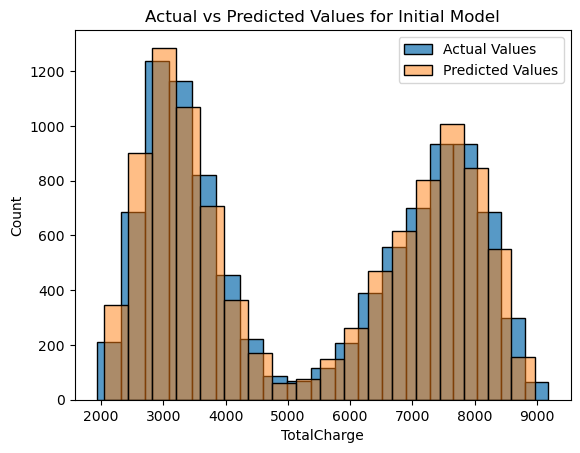

In [54]:
# Actual vs. Predicted Values for Initial Model
sns.histplot(Y_data, label='Actual Values')
sns.histplot(model_prediction, label="Predicted Values", alpha=0.5)
plt.title('Actual vs Predicted Values for Initial Model')
plt.legend();

In [55]:
model.params

const                                  2358.675577
Age                                       0.060576
Income                                    0.000005
VitD_levels                               0.220942
Doc_visits                                1.222980
Complication_risk                      -200.577435
Initial_days                             81.929811
Area_Suburban                             3.975710
Area_Urban                                4.727445
Marital_Married                           4.514919
Marital_Never Married                    -3.355894
Marital_Separated                        -4.737488
Marital_Widowed                          -5.767059
Gender_Male                              -0.520453
Gender_Nonbinary                         13.478394
Initial_admin_Emergency Admission       511.564613
Initial_admin_Observation Admission      -1.771107
Overweight_Yes                            2.337127
Arthritis_Yes                            72.877156
Services_CT Scan               

Initial Regression Model Equation:

TotalCharge = 2358.675577 + 0.060576(Age) +  0.000005(Income) + 0.220942(VitD_levels) + 1.222980(Doc_visits) - 200.577435(Complication_risk) + 81.929811(Initial_days)  
              + 3.975710(Area_Suburban) + 4.727445(Area_Urban) + 4.514919(Marital_Married) - 3.355894(Marital_Never Married) - 4.737488(Marital_Separated) 
              - 5.767059(Marital_Widowed) - 0.520453(Gender_Male) + 13.478394(Gender_Nonbinary) + 511.564613(Initial_admin_Emergency Admission) 
              - 1.771107(Initial_admin_Observation Admission) + 2.337127(Overweight_Yes) + 72.877156(Arthritis_Yes) + 8.360456(Services_CT Scan) 
              - 2.740121(Services_Intravenous) - 1.166686(Services_MRI) + 2.337127(Overweight_Yes) + 71.513515(Diabetes_Yes) + 93.168755(Hyperlipidemia_Yes) 
              + 2.945512(Astha_Yes)

### Feature Selection

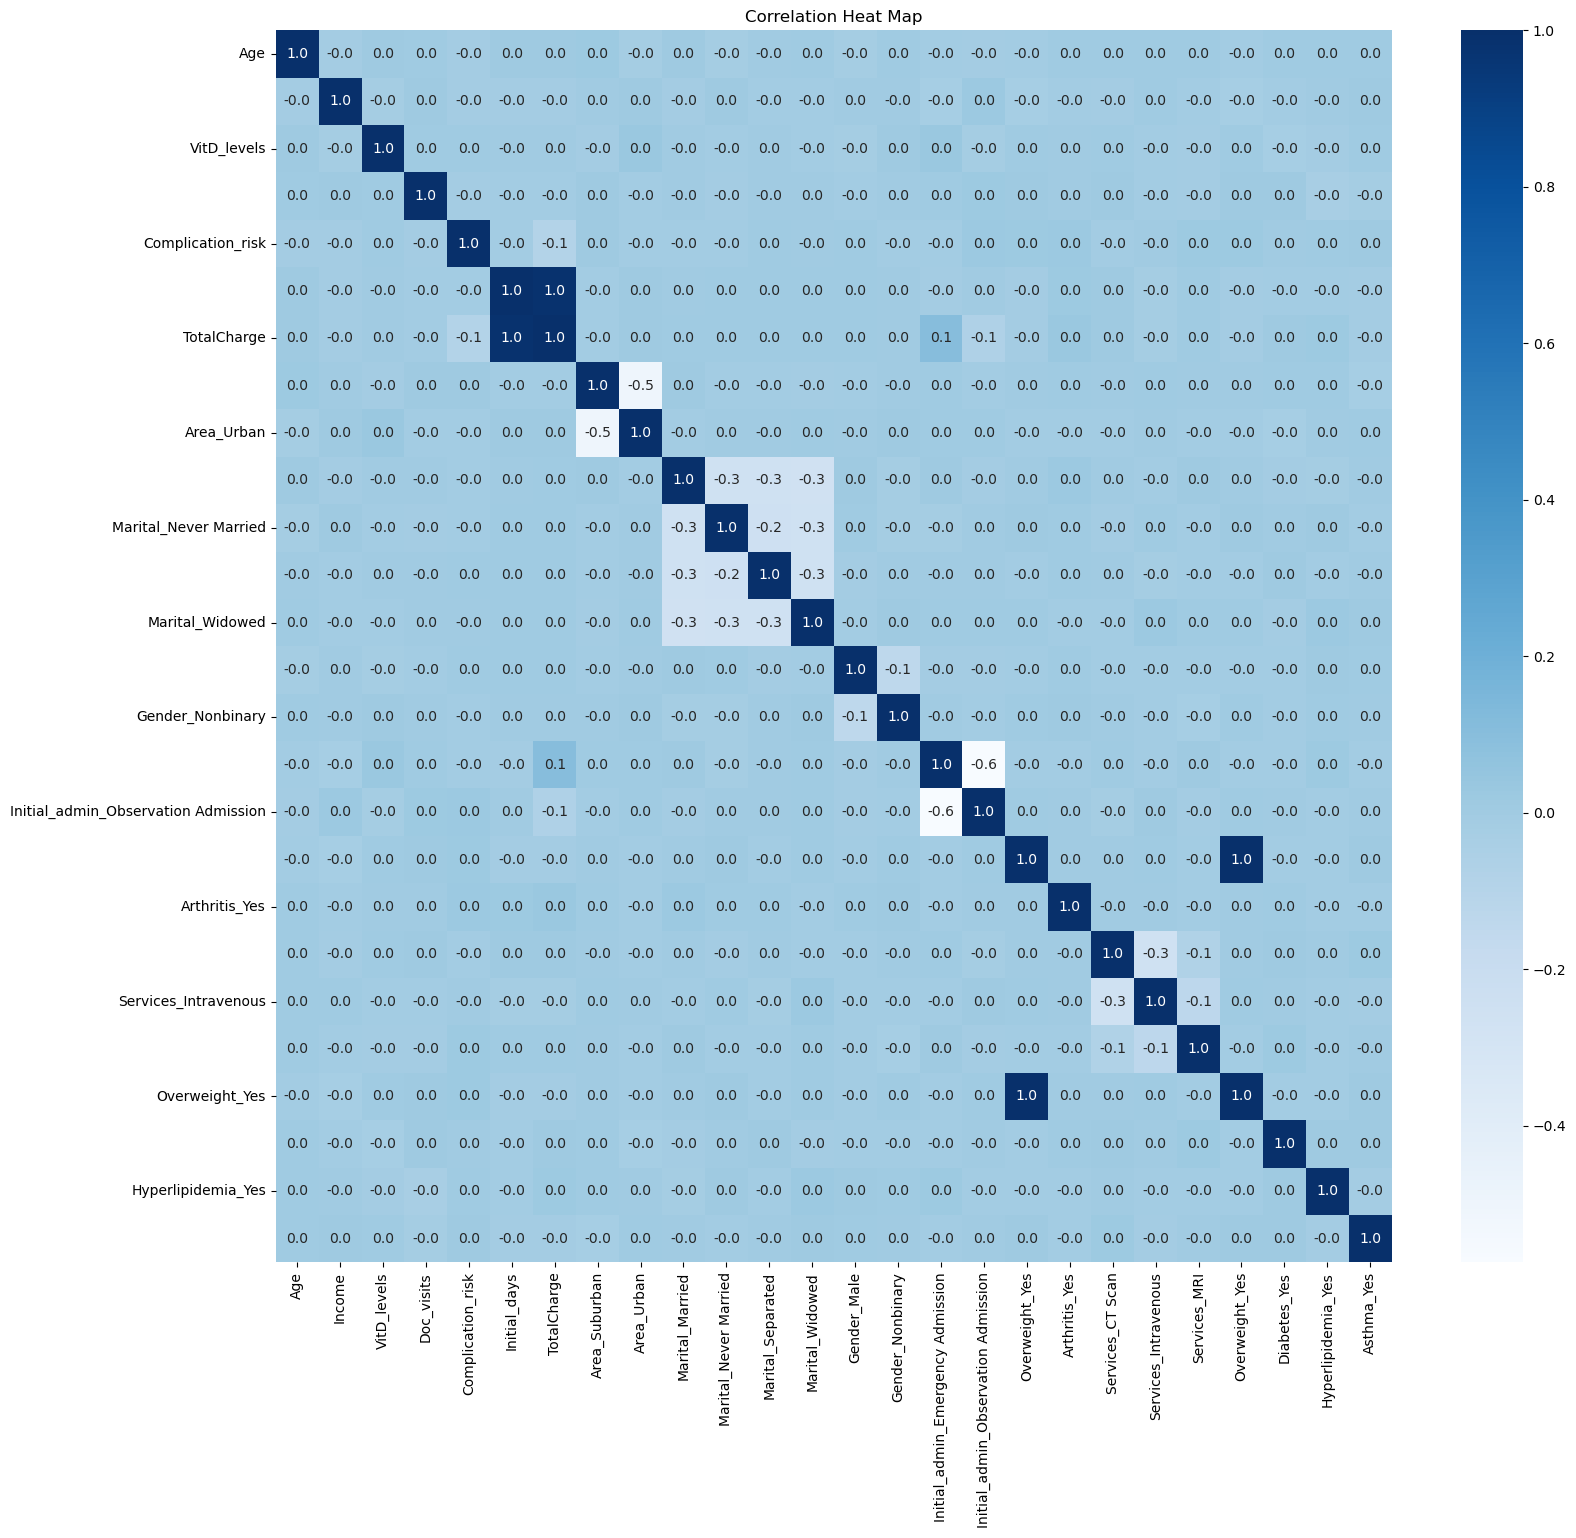

In [56]:
# Visualizing correlation heatmap in seaborn
sns.heatmap(df2.corr(),annot=True, fmt=".1f", cmap='Blues')
plt.title('Correlation Heat Map')
fig = plt.gcf()
fig.set_size_inches(18,16);

In [57]:
# Performing Recursive Feature Elimination to reduce number of explanatory variable

# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


x_rfe = df2.drop('TotalCharge', axis=1)
y_rfe = df2[['TotalCharge']]

selector = RFE(estimator=RandomForestRegressor(), step=1, n_features_to_select=3)
selector = selector.fit(x_rfe,y_rfe,)

In [58]:
# Printing what features were selected by the RFE process
selector.get_feature_names_out()

array(['Complication_risk', 'Initial_days',
       'Initial_admin_Emergency Admission'], dtype=object)

# ▶ Reduced Multiple Linear Regression Model

In [59]:
# Running reduced regression model with features named in RFE above
X_data2 = df2[['Complication_risk', 'Initial_days', 'Initial_admin_Emergency Admission']]
Y_data2 = df2[['TotalCharge']]

print('The shape of the features is:',X_data2.shape)
X_data2.head()
print('The shape of the labels:',Y_data2.shape)
Y_data2.head()

The shape of the features is: (9833, 3)


,Complication_risk,Initial_days,Initial_admin_Emergency Admission
0,2.0,10.585770,1
1,0.0,15.129562,1
2,2.0,4.772177,0
3,2.0,1.714879,0
4,1.0,1.254807,0


The shape of the labels: (9833, 1)


,TotalCharge
0,3726.702860
1,4193.190458
2,2434.234222
3,2127.830423
4,2113.073274


In [60]:
# Adding constant to X_data2
X_data2 = sm.add_constant(X_data2)

# Fitting regression model 
model2 = sm.OLS(Y_data2,X_data2).fit()

# Creating prediction for reduced model 
model2_prediction = model2.predict(X_data2)

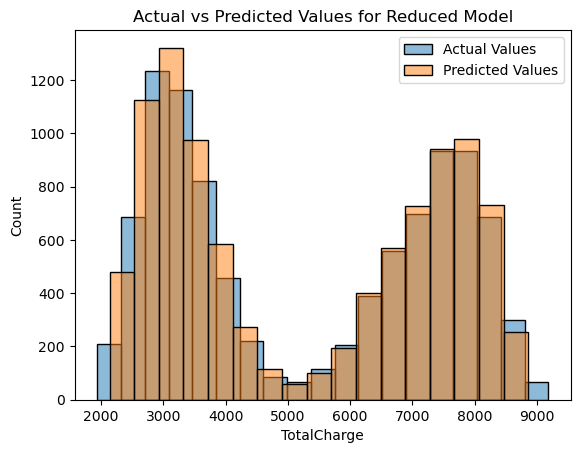

In [61]:
# Actual vs. Predicted Values for Reduced Model
sns.histplot(Y_data2, label='Actual Values')
sns.histplot(model2_prediction, label="Predicted Values", alpha=0.5)
plt.title('Actual vs Predicted Values for Reduced Model')
plt.xlabel('TotalCharge')
plt.legend();

In [62]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 7.874e+05
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:22:56   Log-Likelihood:                -62567.
No. Observations:                9833   AIC:                         1.251e+05
Df Residuals:                    9829   BIC:                         1.252e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [63]:
model2.params

const                                2451.189539
Complication_risk                    -199.260061
Initial_days                           81.945552
Initial_admin_Emergency Admission     513.432540
dtype: float64

Reduced Regression Model Equation:

TotalCharge = 2451.189539 - 199.260061(Complication_risk) + 81.945552(Initial_days) 
              + 513.432540(Initial_admin_Emergency Admission)

# ▶ Residual Plots (Task I)

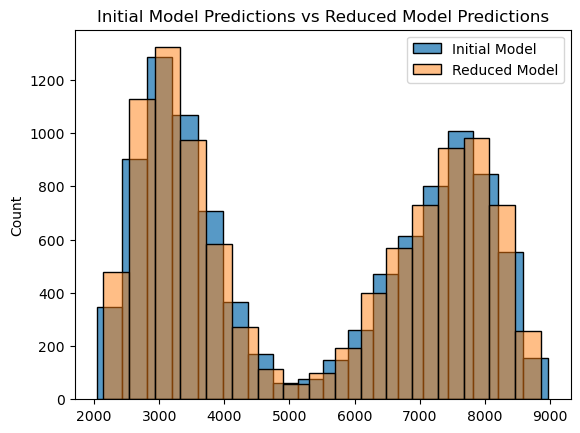

In [64]:
# Initial Model vs Reduced Model Predictions
sns.histplot(model_prediction, label='Initial Model')
sns.histplot(model2_prediction, label="Reduced Model", alpha = 0.5)
plt.title('Initial Model Predictions vs Reduced Model Predictions')
plt.legend();

### Initial Regression Model

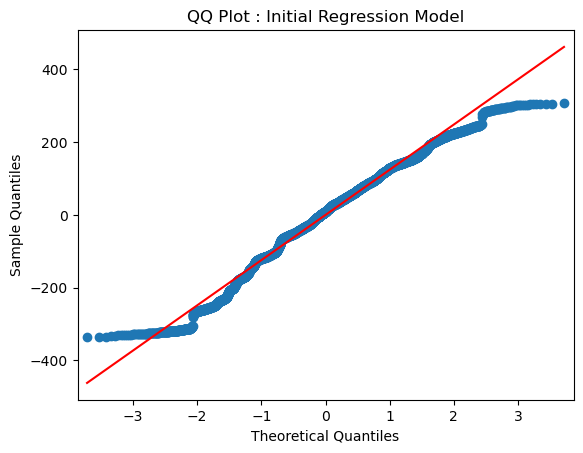

In [65]:
# Q-Q Plot of Initial Regression Model
sm.qqplot(model.resid, line='s')
plt.title('QQ Plot : Initial Regression Model')
plt.show();

In [66]:
# Residual Mean Square Error  
model.bse

const                                  14.421105
Age                                     0.060907
Income                                  0.000049
VitD_levels                             0.631801
Doc_visits                              1.203986
Complication_risk                       1.428909
Initial_days                            0.047783
Area_Suburban                           3.071675
Area_Urban                              3.077262
Marital_Married                         3.986527
Marital_Never Married                   4.008235
Marital_Separated                       4.003062
Marital_Widowed                         3.974880
Gender_Male                             2.541479
Gender_Nonbinary                        8.820819
Initial_admin_Emergency Admission       3.073251
Initial_admin_Observation Admission     3.580703
Overweight_Yes                          1.383681
Arthritis_Yes                           2.622451
Services_CT Scan                        3.990848
Services_Intravenous

### Reduced Regression Model

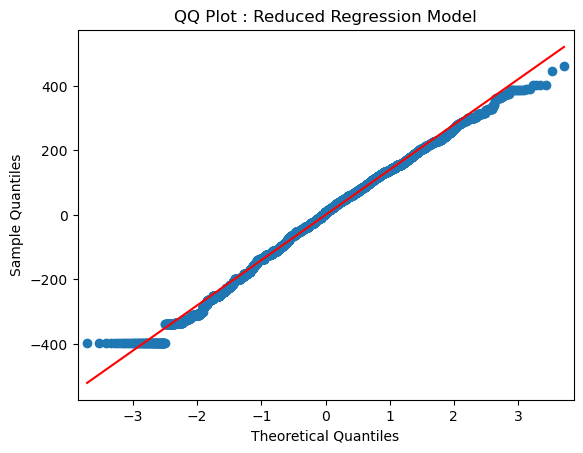

In [67]:
# Q-Q Plot
sm.qqplot(model2.resid, line='s')
plt.title('QQ Plot : Reduced Regression Model')
plt.show();

In [68]:
# Residual Mean Square Error  
model2.bse

const                                3.290264
Complication_risk                    1.608791
Initial_days                         0.053821
Initial_admin_Emergency Admission    2.831513
dtype: float64

# ▶ Initial Logistic Regression Model  
Research Question: **What patient factors cause high cholesterol?**

In [69]:
df2.head()

,Age,Income,VitD_levels,Doc_visits,Complication_risk,Initial_days,TotalCharge,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Overweight_Yes,Arthritis_Yes,Services_CT Scan,Services_Intravenous,Services_MRI,Overweight_Yes,Diabetes_Yes,Hyperlipidemia_Yes,Asthma_Yes
0,53,86575.93,19.141466,6,2.0,10.585770,3726.702860,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1
1,51,46805.99,18.940352,4,0.0,15.129562,4193.190458,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
2,53,14370.14,18.057507,4,2.0,4.772177,2434.234222,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
3,78,39741.49,16.576858,4,2.0,1.714879,2127.830423,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,22,1209.56,17.439069,5,1.0,1.254807,2113.073274,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


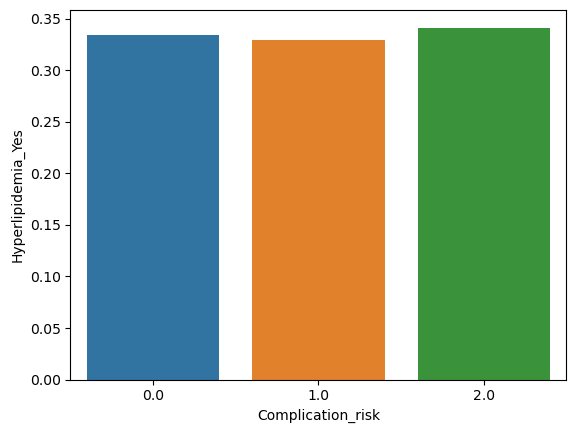

In [70]:
sns.barplot(data=df2, x="Complication_risk", y="Hyperlipidemia_Yes", errorbar=None,);

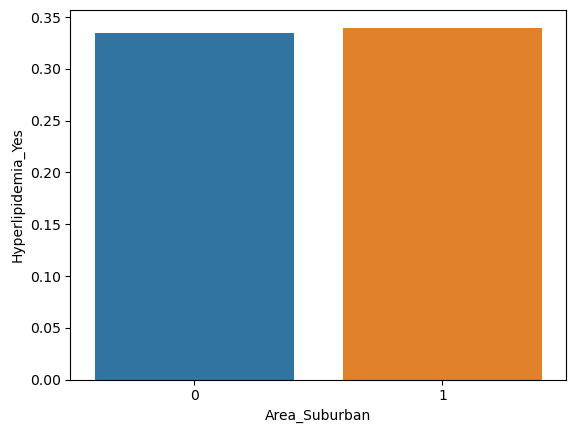

In [71]:
sns.barplot(data=df2, x="Area_Suburban", y="Hyperlipidemia_Yes", errorbar=None);


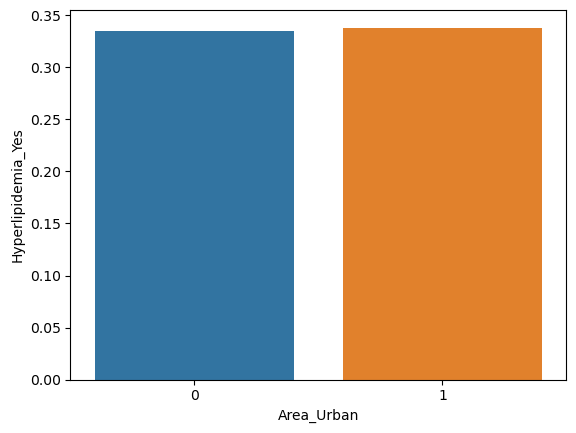

In [72]:
sns.barplot(data=df2, x="Area_Urban", y="Hyperlipidemia_Yes", errorbar=None);


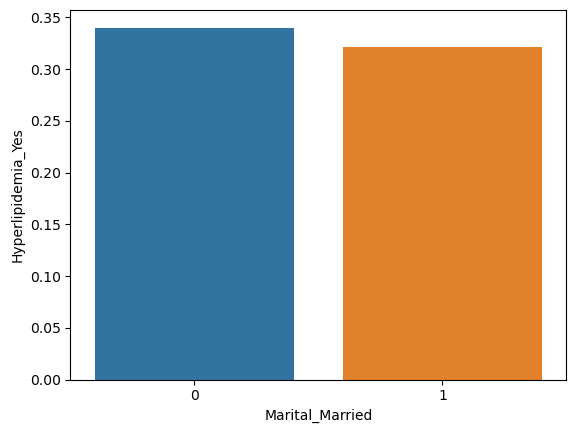

In [73]:
sns.barplot(data=df2, x="Marital_Married", y="Hyperlipidemia_Yes", errorbar=None);


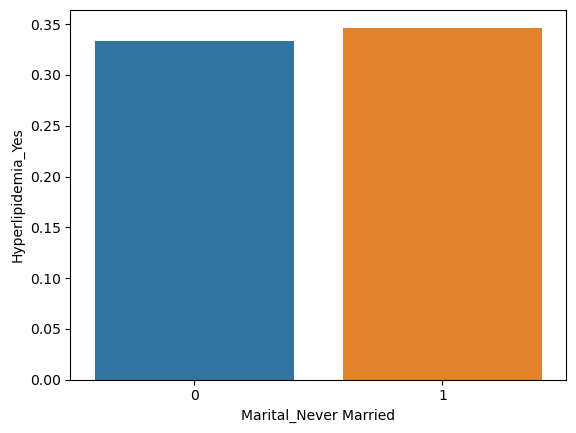

In [74]:
sns.barplot(data=df2, x="Marital_Never Married", y="Hyperlipidemia_Yes", errorbar=None);


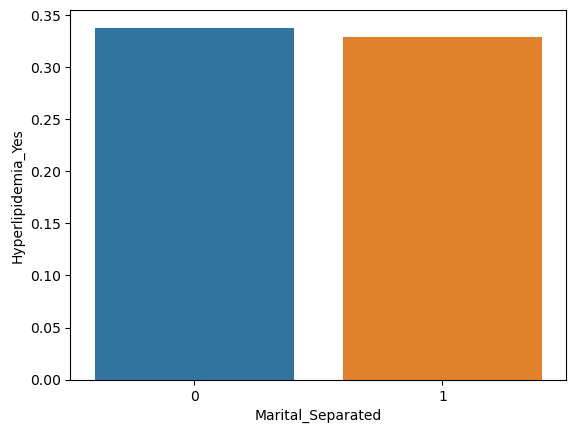

In [75]:
sns.barplot(data=df2, x="Marital_Separated", y="Hyperlipidemia_Yes", errorbar=None);


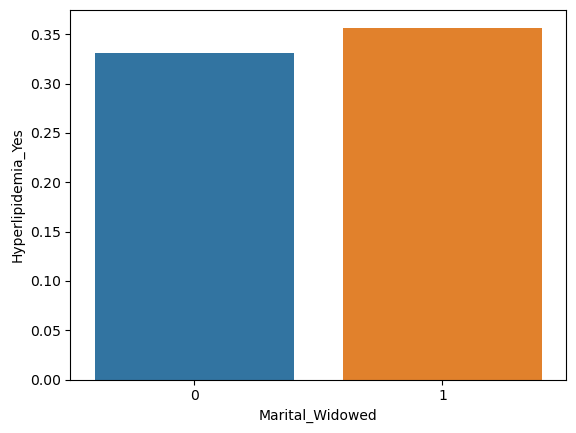

In [76]:
sns.barplot(data=df2, x="Marital_Widowed", y="Hyperlipidemia_Yes", errorbar=None);


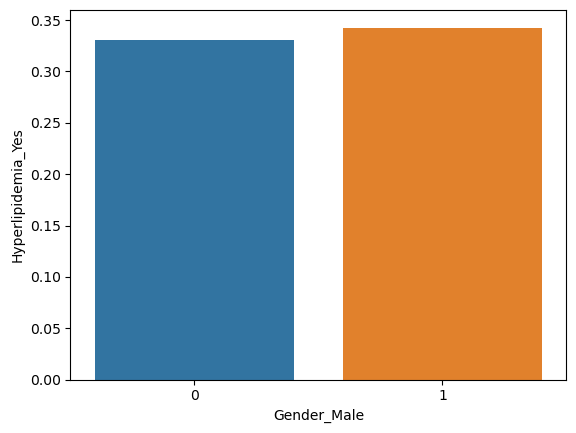

In [77]:
sns.barplot(data=df2, x="Gender_Male", y="Hyperlipidemia_Yes", errorbar=None);

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Creating X and Y vairbales for the logistic regression
X_data_log = df2.drop('Hyperlipidemia_Yes', axis=1)
Y_data_log = df2['Hyperlipidemia_Yes']

# Using SKlearn to split th data to test and train
X_log_train, X_log_test, Y_log_train, Y_log_test = train_test_split(X_data_log, Y_data_log, test_size=0.3, random_state=100)

# Scaling data
scaler = StandardScaler()
X_log_train_scaled = scaler.fit_transform(X_log_train)
X_log_test_scaled = scaler.transform(X_log_test)

#Running Logistic Regression
log_reg = LogisticRegression(random_state=0, fit_intercept=True, solver="liblinear", C=1.0).fit(X_log_train_scaled, Y_log_train)

In [79]:
log_reg.classes_
log_reg.intercept_
log_reg.coef_

array([0, 1], dtype=uint8)

array([-0.71775767])

array([[ 1.20913274e-02, -4.36589618e-03, -3.71682353e-02,
        -8.06876806e-02,  7.54240864e-01, -8.94207935e+00,
         9.00731425e+00,  8.03519393e-03, -7.78759083e-03,
        -3.96372654e-03,  7.12045307e-02,  2.57380066e-02,
         6.44491175e-02,  3.60229032e-02,  2.56532655e-02,
        -1.06335407e+00, -1.86803725e-02, -1.78965408e-02,
        -1.58199250e-01,  1.70472418e-02,  1.84913416e-02,
        -4.41001920e-03, -1.78965408e-02, -9.71382345e-02,
        -2.82047663e-02]])

In [80]:
# Scoring Model using training data
log_reg.score(X_log_train_scaled, Y_log_train)

0.6986779020775824

In [81]:
# Scoring Model using test data
log_reg.score(X_log_test_scaled, Y_log_test)

0.708135593220339

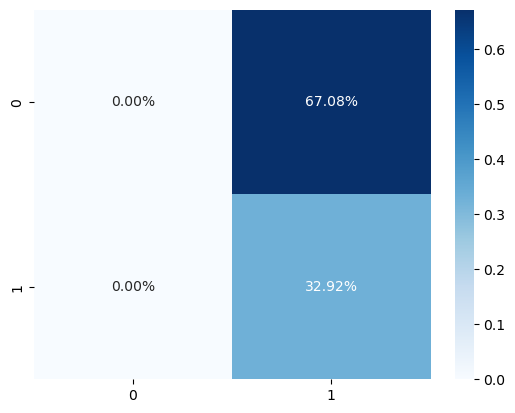

In [82]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_log_test, log_reg.predict(X_log_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

# ▶ Reduced Logistic Regression Model 

In [83]:
# Creating X and Y variables for the logistic regression
X_data2_log = df2[['Complication_risk', 'Initial_days', 'Initial_admin_Emergency Admission']]
Y_data2_log = df2['Hyperlipidemia_Yes']

# Using SKlearn to split th data to test and train
X2_log_train, X2_log_test, Y2_log_train, Y2_log_test = train_test_split(X_data2_log, Y_data2_log, test_size=0.3, random_state=100)

# Scaling data
scaler2 = StandardScaler()
X2_log_train_scaled = scaler.fit_transform(X2_log_train)
X2_log_test_scaled = scaler.transform(X2_log_test)

# Running Model
log_reg_reduced = LogisticRegression(random_state=0, fit_intercept=True, class_weight = None).fit(X2_log_train_scaled, Y2_log_train)

In [84]:
log_reg_reduced.classes_
log_reg_reduced.intercept_
log_reg_reduced.coef_

array([0, 1], dtype=uint8)

array([-0.66695895])

array([[ 0.02214502, -0.03500518,  0.00724142]])

In [85]:
# Scoring Model using training data
log_reg_reduced.score(X2_log_train_scaled, Y2_log_train)

0.6607583902368154

In [86]:
# Scoring Model using testing data
log_reg_reduced.score(X2_log_test_scaled, Y2_log_test)

0.6708474576271186

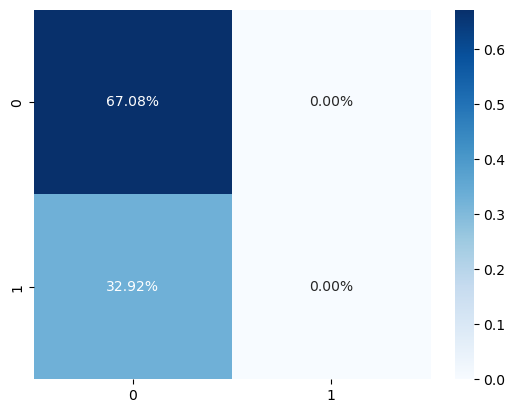

In [87]:
cf_matrix = confusion_matrix(Y2_log_test, log_reg_reduced.predict(X2_log_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

Reduced Logistic Model Equation:

ln(y/(1-y)) = -0.66695895 + 0.02214502(Complication Risk) - 0.03500518(Initial_Days) + 0.00724142(Initial_admin_Emergency Admission)